
Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



ERROR: Error in decompose(spcourt.ts): time series has no or less than 2 periods


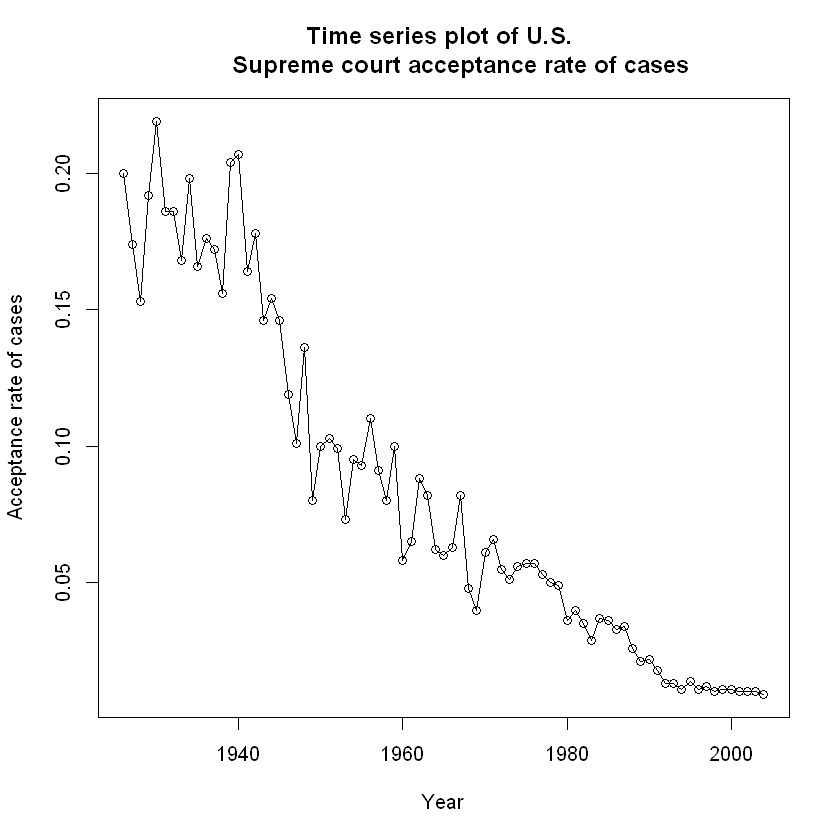

In [1]:
### 2

# a)
library(TSA)
library(forecast)
spcourt.dat <- read.table('supremecourt.txt')
spcourt.ts <- ts(spcourt.dat, start = 1926) # Time series

# Time series plot
plot(spcourt.ts, ylab = 'Acceptance rate of cases', xlab = 'Year', type='o', main='Time series plot of U.S. 
     Supreme court acceptance rate of cases')
# Clear downward trend with nonconstant variation

decompose(spcourt.ts) # No clear periodic behavior
# time series has no or less than 2 periods

Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim

Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim gave code = 1"
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
"possible convergence problem: optim

[1] 0

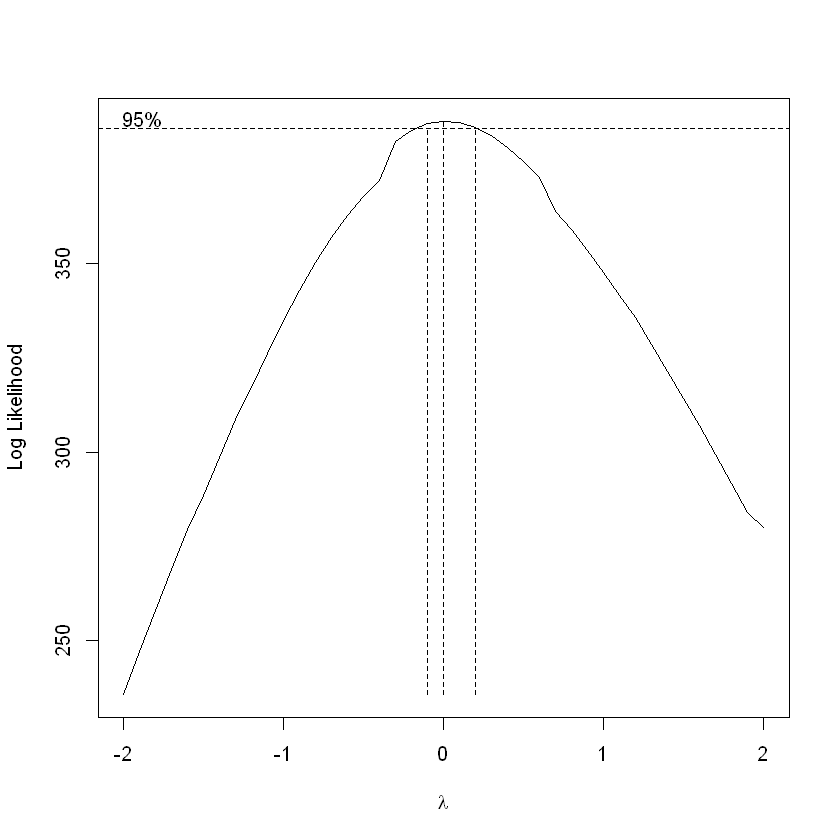

In [2]:
# b)

# Box-Cox transformation due to non-Normal data
spcourt.bc <- BoxCox.ar(spcourt.ts)
spcourt.bc$mle # 0 = max. likelihood estimate of power transformation parameter value, lambda
# This doesn't work for this series

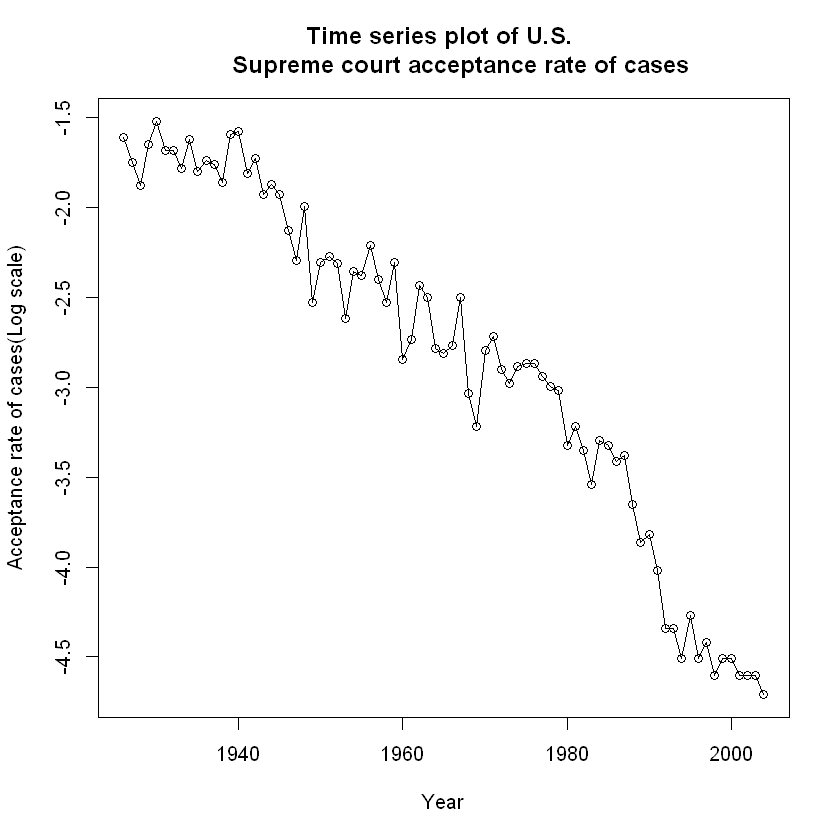

Warning message in adf.test(spcourt.diff):
"p-value smaller than printed p-value"


[1] 0.01

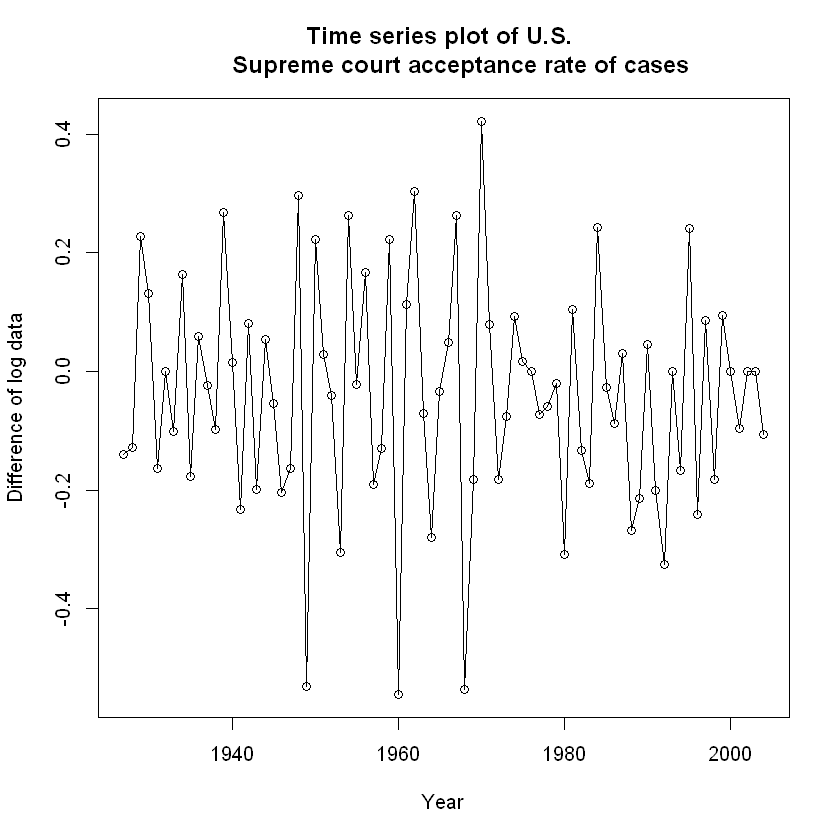

In [3]:
# c)

# Log transformation of the time series data to stabilize the nonconstant variation
spcourt.log <- log(spcourt.ts) # log transformation

# Time series plot of the transformed data
plot(spcourt.log, ylab = 'Acceptance rate of cases(Log scale)', xlab = 'Year', type='o', main='Time series plot of U.S. 
     Supreme court acceptance rate of cases')
# Looks stabilized after the log transformation

# Perform differencing to get rid of the downward trend of the series
spcourt.diff <- diff(spcourt.log)

# Time series plot of the first differenced log-transformed data
plot(spcourt.diff, ylab = 'Difference of log data', xlab = 'Year', type='o', main='Time series plot of U.S. 
     Supreme court acceptance rate of cases')
# The series looks stationary after the first difference of the log-transformed data 

# Augmented unit root test
library(tseries)  

aurt <- adf.test(spcourt.diff) # H0: nonstationary vs H1: stationary

aurt$p.value # p-vlaue = 0.01
# According to the p-value, the series is now stationary

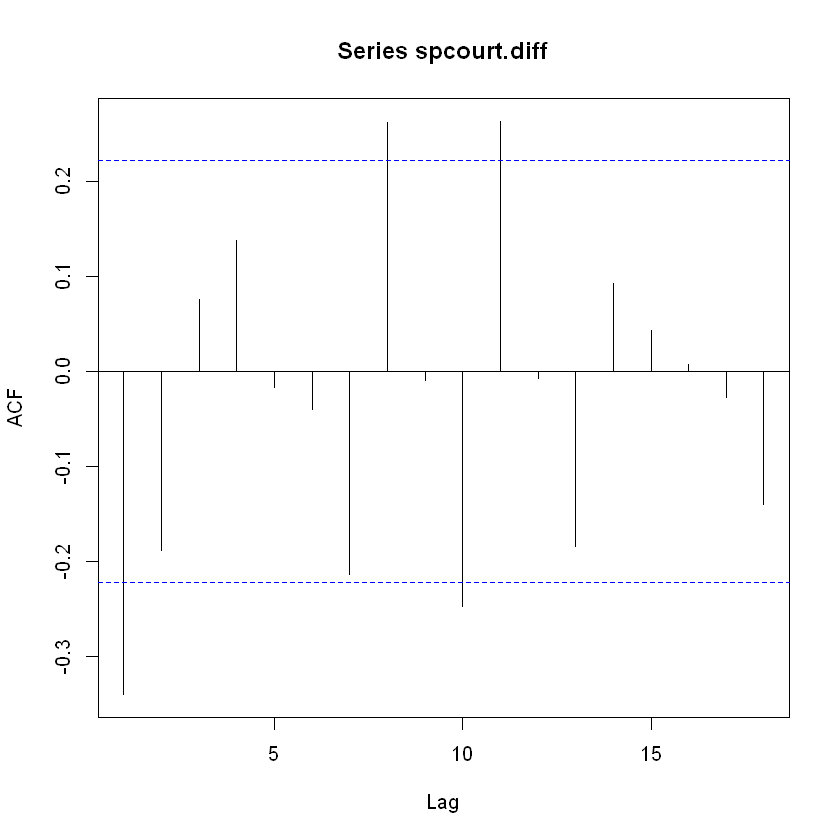

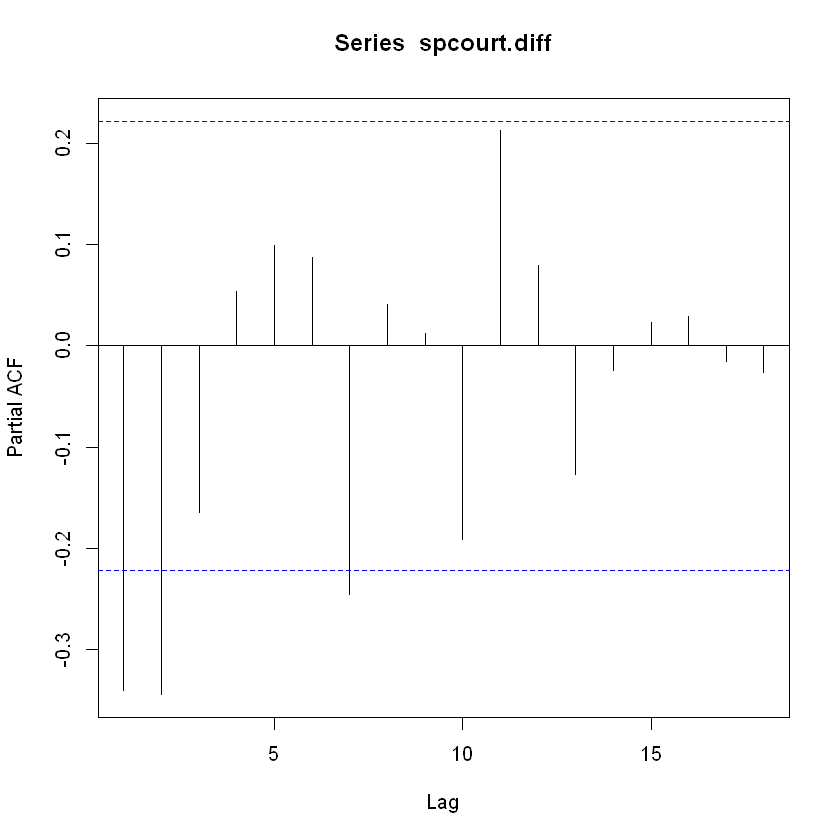

In [4]:
# d)

acf(spcourt.diff) # MA(1)=>ARIMA(0,1,1)?
# 1 major spike at lag 1, cut-off after lag 1

pacf(spcourt.diff) # AR(2)=>ARIMA(2,1,0)?
# 2 signif. spikes at lag 1 and lag 2, cut-off after lag 2

# Due to cut-offs for both MA & AR, we can also suggest ARMA(1,1)=>ARIMA(1,1,1) or ARMA(2,1)=>ARMA(2,1,1)

# Candidate models are: ARIMA(0,1,1), ARIMA(2,1,0), ARIMA(1,1,1) and ARMA(2,1,1)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"3  linear dependencies found"


Reordering variables and trying again:


Series: spcourt.log 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.5265  -0.0391
s.e.   0.0922   0.0093

sigma^2 = 0.03011:  log likelihood = 26.78
AIC=-47.56   AICc=-47.24   BIC=-40.49

Series: spcourt.log 
ARIMA(2,1,2) with drift 

Coefficients:
         ar1      ar2      ma1     ma2    drift
      0.3430  -0.5860  -0.8379  0.6659  -0.0380
s.e.  0.2055   0.1494   0.1791  0.1973   0.0123

sigma^2 = 0.02853:  log likelihood = 30.22
AIC=-48.44   AICc=-47.26   BIC=-34.3


Call:
arima(x = spcourt.log, order = c(0, 1, 1), method = "ML")

Coefficients:
          ma1
      -0.3556
s.e.   0.0941

sigma^2 estimated as 0.03408:  log likelihood = 21.04,  aic = -40.08


Call:
arima(x = spcourt.log, order = c(2, 1, 0), method = "ML")

Coefficients:
          ar1      ar2
      -0.3621  -0.2493
s.e.   0.1099   0.1091

sigma^2 estimated as 0.03301:  log likelihood = 22.24,  aic = -40.47


Call:
arima(x = spcourt.log, order = c(1, 1, 1), method = "ML")

Coefficients:
          ar1      ma1
      -0.0078  -0.3503
s.e.   0.2050   0.1715

sigma^2 estimated as 0.03408:  log likelihood = 21.04,  aic = -38.08


Call:
arima(x = spcourt.log, order = c(2, 1, 1), method = "ML")

Coefficients:
          ar1      ar2      ma1
      -0.3487  -0.2455  -0.0143
s.e.   0.2791   0.1325   0.2731

sigma^2 estimated as 0.03301:  log likelihood = 22.24,  aic = -38.48


Call:
arima(x = spcourt.log, order = c(0, 1, 4), method = "ML")

Coefficients:
          ma1      ma2     ma3     ma4
      -0.4049  -0.0355  0.2387  0.1214
s.e.   0.1176   0.1184  0.1114  0.1060

sigma^2 estimated as 0.03033:  log likelihood = 25.37,  aic = -42.74


Call:
arima(x = spcourt.log, order = c(2, 1, 4), method = "ML")

Coefficients:
          ar1      ar2     ma1      ma2     ma3     ma4
      -0.9709  -0.3242  0.5656  -0.1664  0.0934  0.4627
s.e.   0.2955   0.2564  0.2734   0.1673  0.1645  0.1246

sigma^2 estimated as 0.02904:  log likelihood = 26.72,  aic = -41.45


Call:
arima(x = spcourt.log, order = c(2, 1, 2), method = "ML")

Coefficients:
         ar1      ar2      ma1     ma2
      0.4919  -0.6180  -0.9226  0.7994
s.e.  0.1565   0.1476   0.1123  0.1409

sigma^2 estimated as 0.02938:  log likelihood = 26.41,  aic = -44.81

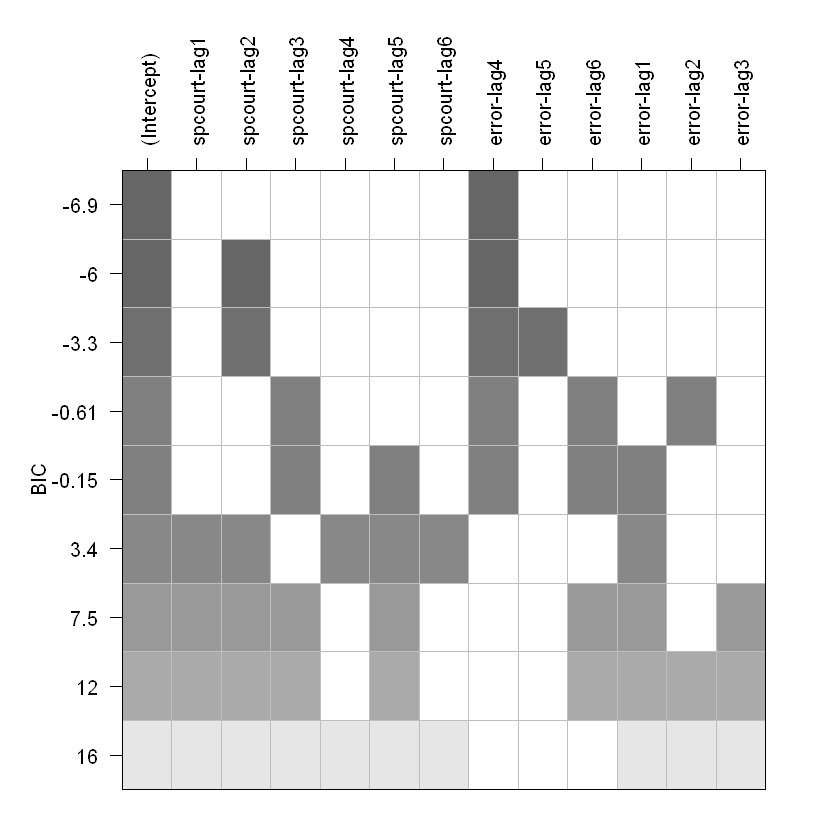

In [5]:
# e)

# Find subset models

sp.order <- armasubsets(y=spcourt.diff, nar = 6, nma = 6, y.name = 'spcourt', ar.method = 'ols')
plot(sp.order) # ARMA(0, 4)=>ARIMA(0,1,4)?, ARMA(2,4)=>ARIMA(2,1,4)?

# automatically find the best ARIMA model using bic
auto.arima(spcourt.log, ic='bic') # This suggests ARIMA(0,1,1) with non-zero mean

# Series: spcourt.log 
# ARIMA(0,1,1) with drift 
# 
# Coefficients:
#         ma1    drift
#       -0.5265  -0.0391
# s.e.   0.0922   0.0093
# 
# sigma^2 estimated as 0.03011:  log likelihood=26.78
# AIC=-47.56   AICc=-47.24   BIC=-40.49

# automatically find the best ARIMA model using aic
auto.arima(spcourt.log, ic='aic') # This suggests ARIMA(2,1,2) with non-zero mean

# Series: spcourt.log 
# ARIMA(2,1,2) with drift 
# 
# Coefficients:
#         ar1      ar2      ma1     ma2    drift
#       0.3430  -0.5860  -0.8379  0.6659  -0.0380
# s.e.  0.2055   0.1494   0.1791  0.1973   0.0123
# 
# sigma^2 estimated as 0.02853:  log likelihood=30.22
# AIC=-48.44   AICc=-47.26   BIC=-34.3

# Compare all candidate models using aic as criteria

arima(spcourt.log, order = c(0,1,1), method = 'ML') # log likelihood = 21.04,  aic = -40.08

arima(spcourt.log, order = c(2,1,0), method = 'ML') # llog likelihood = 22.24,  aic = -40.47

arima(spcourt.log, order = c(1,1,1), method = 'ML') # log likelihood = 21.04,  aic = -38.08

arima(spcourt.log, order = c(2,1,1), method = 'ML') # log likelihood = 22.24,  aic = -38.48

arima(spcourt.log, order = c(0,1,4), method = 'ML') # log likelihood = 25.37,  aic = -42.74 

arima(spcourt.log, order = c(2,1,4), method = 'ML') # log likelihood = 26.72,  aic = -41.45

arima(spcourt.log, order = c(2,1,2), method = 'ML') # log likelihood = 26.41,  aic = -44.81

# Results from above shows ARIMA(2,1,2) is the best model

spcourt.ml <- arima(spcourt.log, order = c(2,1,2), method = 'ML') # log likelihood = 24.14,  aic = -42.28

# Call:
#   arima(x = spcourt.log, order = c(2, 1, 2), method = "ML")
# 
# Coefficients:
#         ar1      ar2      ma1     ma2
#       0.4919  -0.6180  -0.9226  0.7994
# s.e.  0.1565   0.1476   0.1123  0.1409
# 
# sigma^2 estimated as 0.02938:  log likelihood = 26.41,  aic = -44.81

# Mathematical (equation) expression of the fitted model

# (1-B)log(X_t) = 0.4919*X_{t-1} - 0.6180*X_{t-2} - 0.9226*Z_{t-1} + 0.7994*Z_{t-2} + Z_t


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)
Q* = 9.438, df = 6, p-value = 0.1504

Model df: 4.   Total lags used: 10



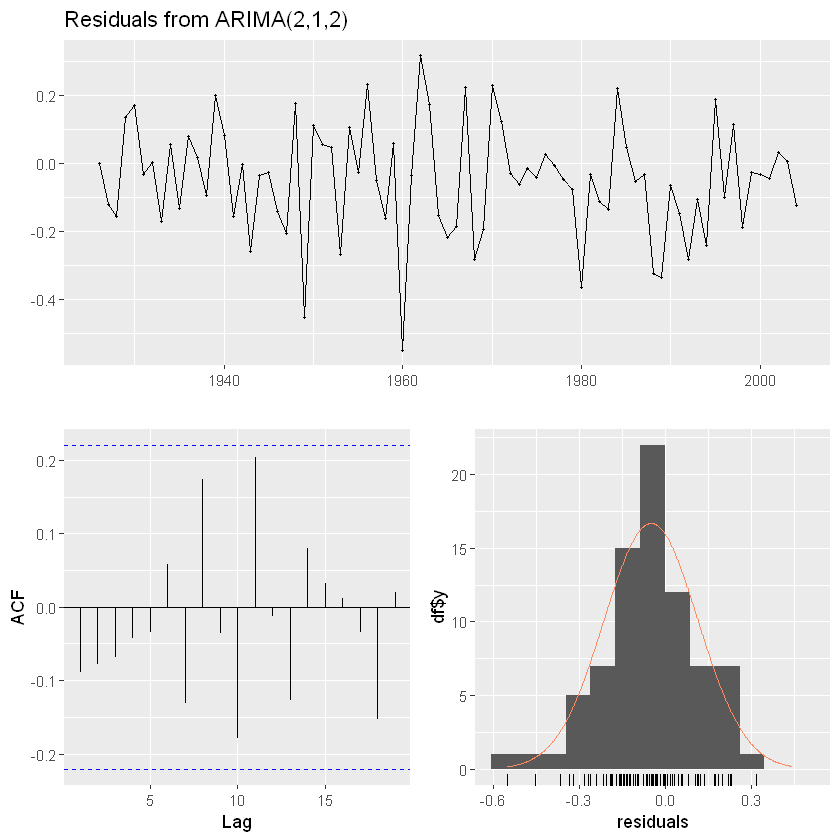

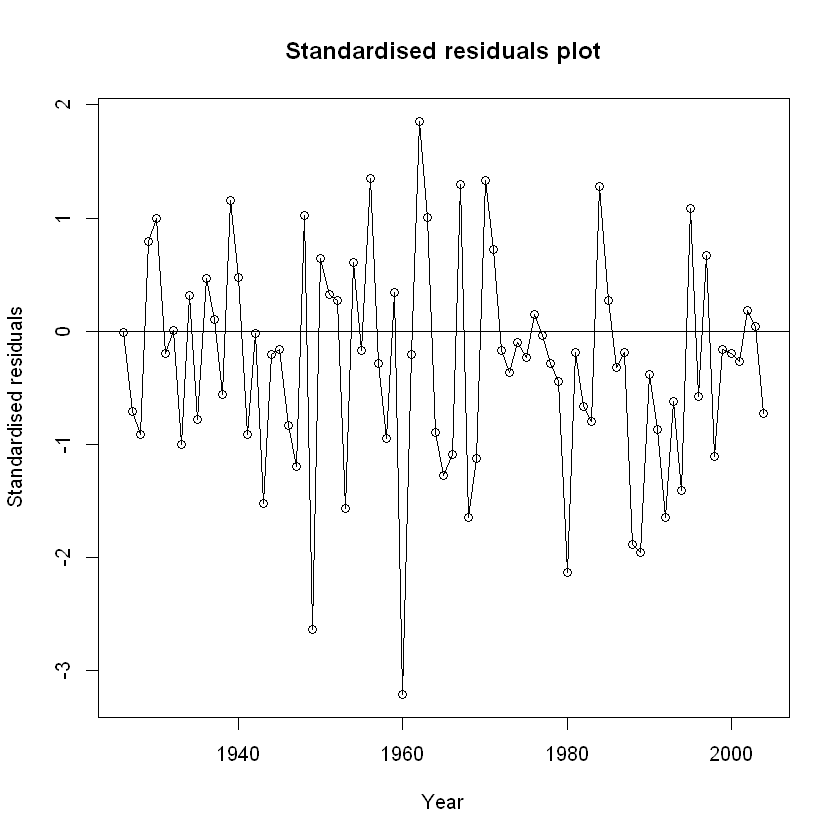

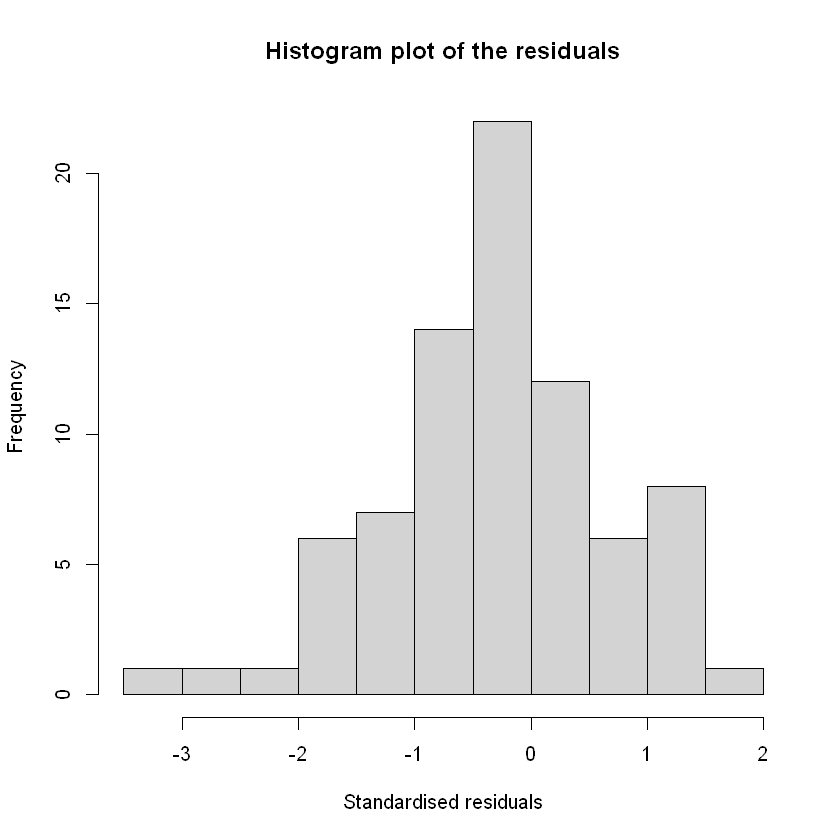

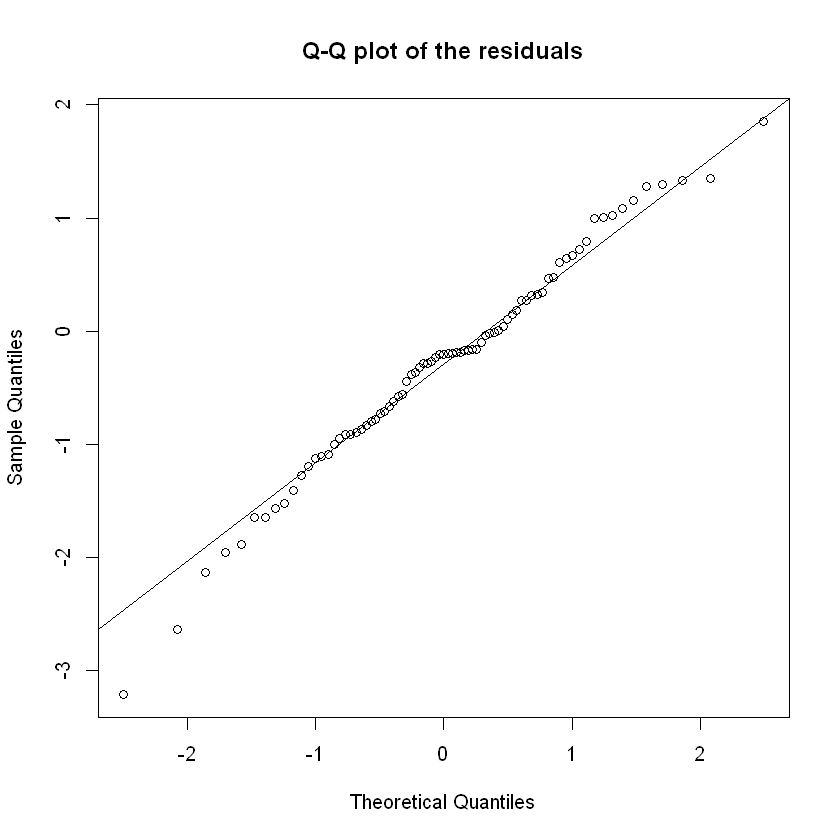


	Box-Ljung test

data:  residuals(spcourt.ml)
X-squared = 9.438, df = 8, p-value = 0.3067


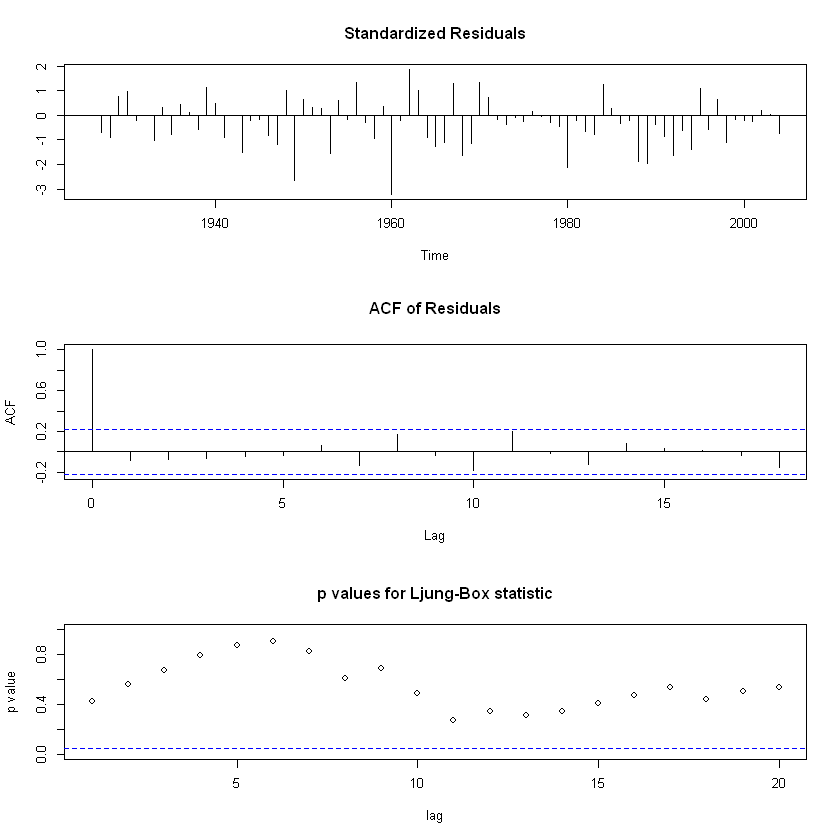

In [6]:
# f)

# Diagnostics for the fit of the chosen model 

# Check residuals for the selected model

checkresiduals(spcourt.ml) # Quick check of the residuals p-value = 0.1504

# Sample ACF and histogram of the residuals look good 
# The residuals plot looks quite stationary
# The p-value supports the stationarity of the series

# Standardised residuals plot to check the residuals
plot(rstandard(spcourt.ml), xlab="Year", ylab="Standardised residuals", type='o', main = 'Standardised residuals plot')
abline(h=0)
# The plot looks stationary with mean zero

# Normality check for the residuals
hist(rstandard(spcourt.ml),xlab="Standardised residuals",main="Histogram plot of the residuals")
#Looks okay

qqnorm(rstandard(spcourt.ml),main="Q-Q plot of the residuals")
qqline(rstandard(spcourt.ml))
# Looks fairly good with a fairly good fit

# Diagnostic Plots for Time-Series Fits
tsdiag(spcourt.ml, gof=20, omit.initial=F)
# The standardized residuals, ACF of residuals and p-values for Ljung-Box statistic all look good
# The residual output fully supports ARIMA(2,1,2) model 

Box.test(residuals(spcourt.ml),lag =10, type="Ljung-Box",fitdf=2)  # Box-Ljung test  with fitdf=p+q
# p-value for the Ljung-Box does not reject the null hypothesis. It confirms that the residuals behave like a white noise

# Box-Ljung test
# 
# data:  residuals(spcourt.ml)
# X-squared = 9.438, df = 8, p-value = 0.3067